# Loading improtant libraries for the code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq

Loading the data for imu in four different positions

In [2]:
# theta_180_1 = pd.read_csv('180_theta_1.csv')
# theta_180_2 = pd.read_csv('180_theta_2.csv')
# half_theta_1 = pd.read_csv('Half_theta.csv')
half_theta_2 = pd.read_csv('Half_theta_2.csv')
df = half_theta_2
df.head()

,xAccl,yAccl,zAccl,newPosition,time,pcTime
0,1007,-66,-48,0,346576,440.875053
1,1007,-72,-59,0,371498,465.658903
2,1008,-75,-45,0,396502,490.717888
3,1006,-65,-53,0,421509,515.764952
4,1011,-67,-53,0,446513,540.741920


In [3]:
df['delta_time'] = df['pcTime'].diff()
df.head(10)

,xAccl,yAccl,zAccl,newPosition,time,pcTime,delta_time
0,1007,-66,-48,0,346576,440.875053,NaN
1,1007,-72,-59,0,371498,465.658903,24.783850
2,1008,-75,-45,0,396502,490.717888,25.058985
3,1006,-65,-53,0,421509,515.764952,25.047064
4,1011,-67,-53,0,446513,540.741920,24.976969
5,1008,-74,-44,0,471520,565.711021,24.969101
6,1007,-75,-54,0,496524,590.770006,25.058985
7,1009,-70,-54,0,521532,615.640163,24.870157
8,1011,-68,-55,0,546535,640.830040,25.189877
9,1008,-77,-49,0,571542,665.774107,24.944067


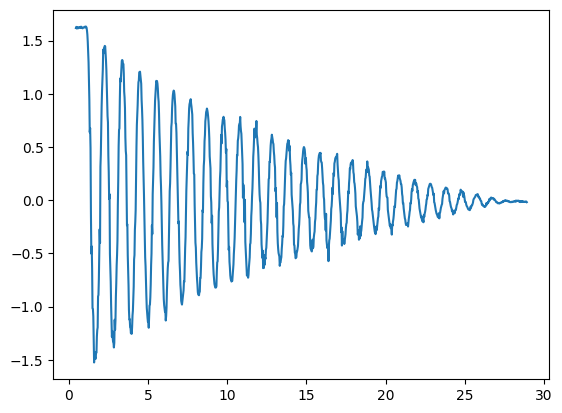

In [4]:
theta = np.arctan2(df['xAccl'], df['zAccl'])
# theta = np.degrees(theta)
plt.plot(df['pcTime']/1000, theta)


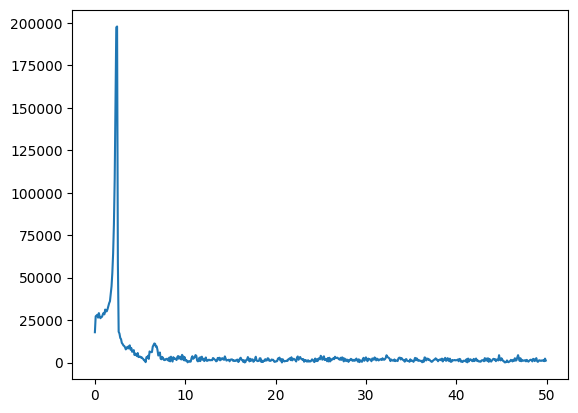

In [5]:
data = fft(df['xAccl'])
fftfreqs = fftfreq(len(data), d=0.01)
plt.plot(fftfreqs[:len(data)//2], np.abs(data)[:len(data)//2])



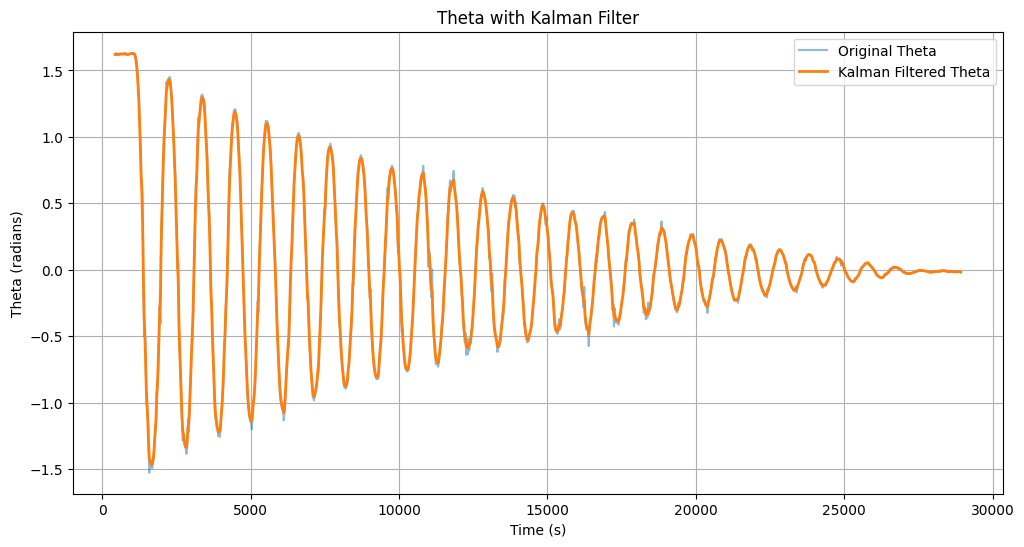

In [6]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq
from pykalman import KalmanFilter

# Calculate theta from accelerometer data
theta = np.arctan2(df['xAccl'], df['zAccl'])

# Initialize Kalman filter
kf = KalmanFilter(
    initial_state_mean=theta[0],
    transition_matrices=[1],  # Assumes state transition is 1: x_k = x_{k-1}
    observation_matrices=[1],  # Measurement is directly related to state
    transition_covariance=[[1e-3]],  # Process noise
    observation_covariance=[[0.001]]  # Measurement noise
)

# Apply Kalman filter
theta_kalman, _ = kf.smooth(theta)

# Plot original and filtered theta
plt.figure(figsize=(12, 6))
plt.plot(df['pcTime'], theta, label='Original Theta', alpha=0.5)
plt.plot(df['pcTime'], theta_kalman, label='Kalman Filtered Theta', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Theta (radians)')
plt.title('Theta with Kalman Filter')
plt.legend()
plt.grid(True)
plt.show()




In [7]:
theta_kalman = theta_kalman.reshape(-1)


In [8]:
# Calculate theta from accelerometer data
# Create a new dataframe with theta and pcTime
theta_data = pd.DataFrame({
    'pcTime': df['pcTime'],
    'theta': theta_kalman
})

# Save to CSV file
theta_data.to_csv('theta.csv', index=False)
print("Data saved to theta.csv")


Data saved to theta.csv
